In [1]:
%matplotlib inline
import pandas as pd

In [12]:
suppT2 = pd.read_csv('/home/ariel/Downloads/supplementary-Table-S2-The-testing-missense-variants-of-benchmark-datasets.csv',
                     sep = '\t')

In [16]:
suppT2.rename(columns = {'Data source':'Data_source'},inplace = True)
suppT2.head()

,Data_source,Chr,Start,End,Ref,Alt,Gene_symbol,Label
0,ClinVar,chr15,23890816,23890816,C,T,MAGEL2,Benign
1,ClinVar,chr2,84756049,84756049,G,A,DNAH6,Benign
2,ClinVar,chr2,179518937,179518937,T,C,TTN,Benign
3,ClinVar,chr8,10467652,10467652,G,C,RP1L1,Benign
4,ClinVar,chr17,76497920,76497920,C,A,DNAH17,Benign


# Sources:


#### 1) *  Clinvar es clinvar ;)

#### 2) * Notar que TP53 + ICGC  son ambas de Cancer. 
* Conforman un solo dataset de validacion

#### 3) * PPARG gen 
* (peroxisome proliferator activated receptor γ)  experimentalmente,  evaluaron todas las posibles sustituciones de aminoacidos. Este conforma un dataset de evaluacion per-se.  MITER database


#### 4) * De novo (autismo vs control) 
* SSC 2508 pacietes con autismo vs 1911 pacientes en grupo control

In [31]:
sources = suppT2.Data_source.value_counts().index
suppT2.Data_source.value_counts()


ClinVar    4880
SSC        2757
PPARG      2533
TP53       1014
ICGC        811
Name: Data_source, dtype: int64

# Minimal Clinvar caracterization

In [29]:
supp_clnv = suppT2[suppT2.Data_source=='ClinVar']
supp_clnv.Label.value_counts()

Benign        2782
Pathogenic    2098
Name: Label, dtype: int64

# Label caracterization per source

In [32]:
suppT2.groupby(['Data_source'])['Label'].value_counts()

Data_source  Label                       
ClinVar      Benign                          2782
             Pathogenic                      2098
ICGC         Likely pathogenic                429
             Pathogenic/Likely pathogenic     189
             Pathogenic                       145
             Benign                            38
             Likely benign                     10
PPARG        not pathogenic                  2386
             pathogenic                       147
SSC          asd                             1650
             control                         1107
TP53         functional                       537
             non-functional                   477
Name: Label, dtype: int64

## Este diccionario es acorde al paper   (Jinchen Li et al 2018)

In [33]:
patho_beningn = {'Benign':'Benign',
'Pathogenic':'Pathogenic',
'Likely pathogenic':'Pathogenic',
'Pathogenic/Likely pathogenic':'Pathogenic',
'Likely benign':'Benign',
'not pathogenic':'Pathogenic',
'pathogenic':'Pathogenic',
'asd':'Pathogenic',
'control':'Benign',
'functional':'Benign',   
'non-functional':'Pathogenic'}

# Perdemos a lo susmo 4474  Benignas
*  si es que fueran todas raras y con algun homozigota en gnomad...

#  Perdemos a lo sumo 7521  Patogenicas 
* uno pensaria que solo pierde las de clinvar (unas 2000) pero Clinvar pudo haberse actualizado desde entonces y pudo haber incorporado algunas de las 5500 patogenicas que vienen de otros datasets...

In [34]:
suppT2.Label.replace(patho_beningn).value_counts()

Pathogenic    7521
Benign        4474
Name: Label, dtype: int64

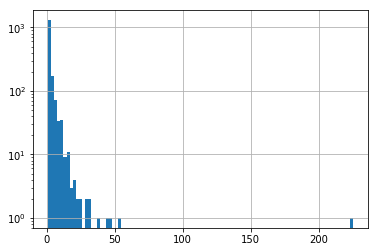

In [41]:
# bias por gen: (pendiente ver qué genes componen la cola de la distribución, circularidad de tipo 2)
supp_clnv.Gene_symbol.value_counts().hist(bins = 100,log = True)#.value_counts().head(10)

# No hay algun indel filtrado...

In [28]:
any(suppT2.Start != suppT2.End)

False